# Tutorial 1 - PyTorch Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

## Tensor Initalization
Tensors can be initialized in various ways. Take a look at the following examples:



In [28]:
import torch
import numpy as np

### Directly from data

Tensors can be created directly from data. The data type is automatically inferred.

In [29]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

### From a NumPy array

Tensors can be created from NumPy arrays.

In [30]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [31]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f'Ones tensor: \n {x_ones} \n')

x_rand = torch.rand_like(x_data, dtype=torch.float) # Overrides the datatype pf x_data
print(f'Random tensor: \n {x_rand} \n')

Ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random tensor: 
 tensor([[0.2885, 0.8175],
        [0.2453, 0.3855]]) 



### With random or constant values:

`shape` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [32]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor: \n {rand_tensor} \n")
print(f"Ones tensor: \n {ones_tensor} \n")
print(f"Zeros tensor: \n {zeros_tensor} \n")

Random tensor: 
 tensor([[0.6134, 0.1004, 0.2468],
        [0.3199, 0.1596, 0.7678]]) 

Ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



## Tensor Attributes
Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [33]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
print(f"Tensor: \n {tensor} \n")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Tensor: 
 tensor([[0.8496, 0.8511, 0.2839, 0.5765],
        [0.6216, 0.5885, 0.8978, 0.6668],
        [0.9027, 0.1740, 0.5843, 0.1849]]) 



## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensevly described [here](https://pytorch.org/docs/stable/torch.html).

Each of them can be run on the GPU (at typically higher speeds than on a CPU). If you're using Colab, allocate a GPU by going to Edit > Notebook Settings.

In [34]:
if torch.cuda.is_available():
  tensor = tensor.to("cuda")
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


### Standard numpy-like indexing and slicing:

In [35]:
tensor = torch.ones(4, 4)
tensor[:, 1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors:
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from `torch.cat`.

In [36]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Multiplying tensors

In [37]:
# This computes the element-wise product
print(f"tensor.mul(tensor)\n {tensor.mul(tensor)} \n")

# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor} \n")

tensor.mul(tensor)
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



This computes the matrix multiplication between two tensors: Yani dot product, üstteki element-wise idi.



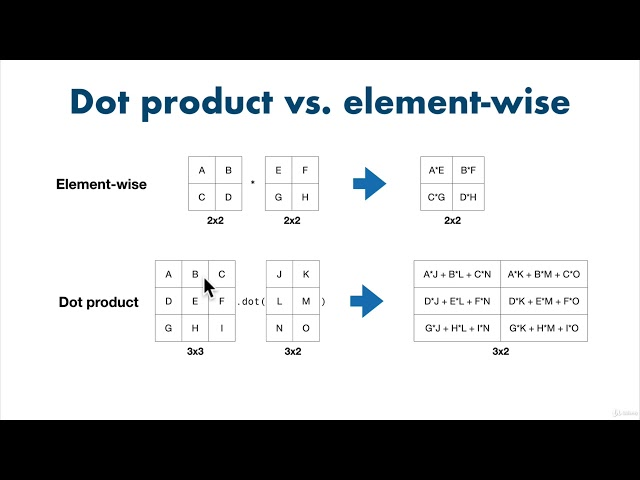

In [38]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")

# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T} \n")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 



### In-place operations

Operations that have a `_` suffix are in-place. For example: `x.copy_(y)`, `x.t_()`, will change x.

In [39]:
print("Before addition: \n", tensor, "\n")
tensor.add_(5)
print("After addition: \n", tensor, "\n")

Before addition: 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

After addition: 
 tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 



### NOTE
In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

### Tensor to NumPy array

In [41]:
t = torch.ones(5)
print(f"tensor: {t}")

n = t.numpy()
print(f"numpy: {n}")

tensor: tensor([1., 1., 1., 1., 1.])
numpy: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.

In [42]:
t.add_(1)
print(f"tensor: {t}")
print(f"numpy: {n}")

tensor: tensor([2., 2., 2., 2., 2.])
numpy: [2. 2. 2. 2. 2.]


### NumPy array to Tensor


In [43]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [44]:
np.add(n, 1, out=n)
print(f"tensor: {t}")
print(f"numpy: {n}")

tensor: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
numpy: [2. 2. 2. 2. 2.]
